<a href="https://colab.research.google.com/github/anmol-dwivedi/TSF-Test/blob/main/Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [1]:
!pip install pystan
!pip install fbprophet

In [4]:
import fbprophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


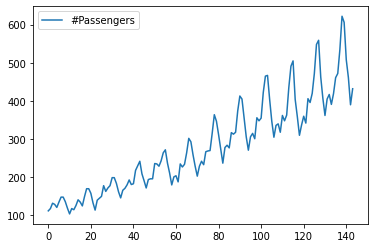

In [8]:
df.plot()

In [9]:
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.rename(columns = {"#Passengers":"Pax"}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   144 non-null    datetime64[ns]
 1   Pax     144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [24]:
df = df.set_index('Month')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pax     144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


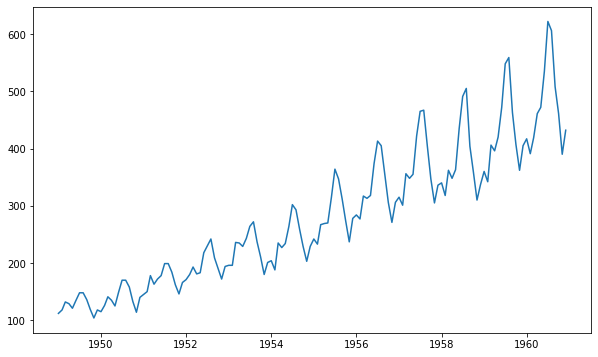

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.Month, df.Pax, label='Pax')
plt.show()


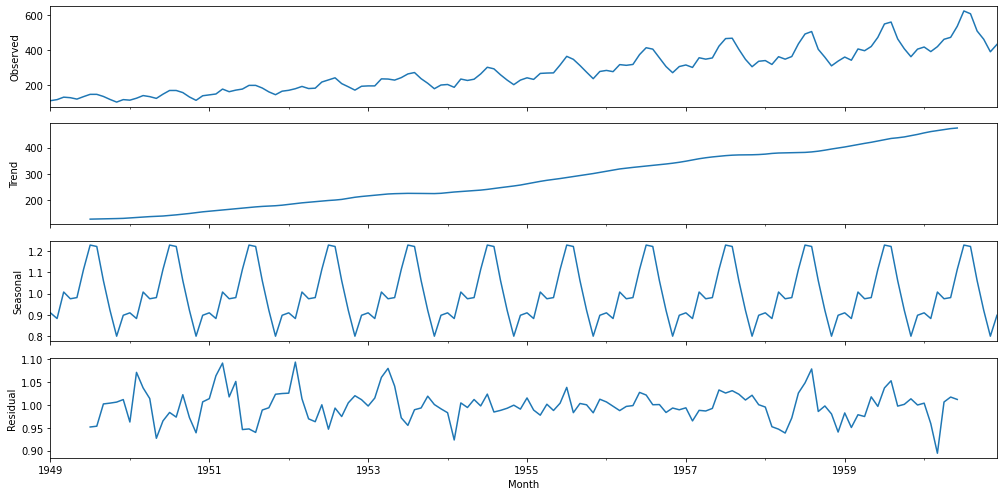

In [27]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose


rcParams["figure.figsize"] = 14,7

decomposition = seasonal_decompose(df.Pax, model="multiplicative")
decomposition.plot()
plt.show()

# Prophet Prediction

In [31]:
from fbprophet import Prophet

In [34]:
ds = pd.read_csv("AirPassengers.csv")
ds.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [40]:
ds.columns= ["ds", "y"]

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [43]:
model = Prophet()
model.fit(ds)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [45]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [46]:
# create future dates
future_dates=model.make_future_dataframe(periods=365)

In [47]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [48]:
prediction = model.predict(future_dates)

In [49]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,54.803183,114.467718,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,48.737370,107.137805,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,80.001009,136.852324,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.285668,135.693361,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,82.561687,138.118154,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [50]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.807353,54.803183,114.467718
1,1949-02-01,78.218354,48.737370,107.137805
2,1949-03-01,110.361397,80.001009,136.852324
3,1949-04-01,107.851823,79.285668,135.693361
4,1949-05-01,111.351735,82.561687,138.118154


In [51]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,498.285073,468.190845,524.793403
505,1961-11-28,496.755524,466.362895,526.583925
506,1961-11-29,494.588071,468.041739,521.397748
507,1961-11-30,491.826895,464.621624,518.395320
508,1961-12-01,488.531541,458.625722,517.430983


In [52]:
# plotting the Predictions

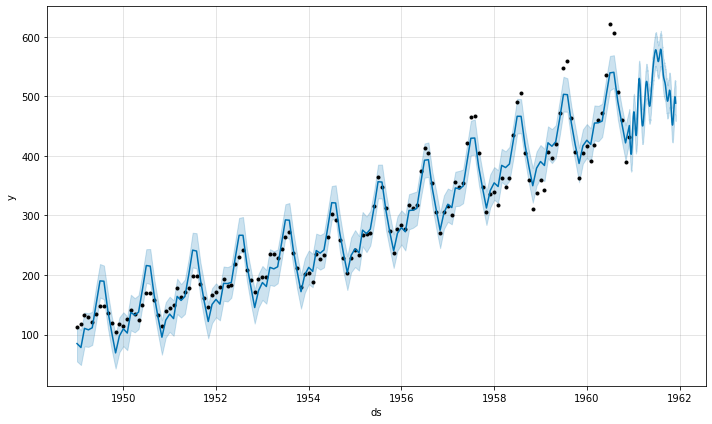

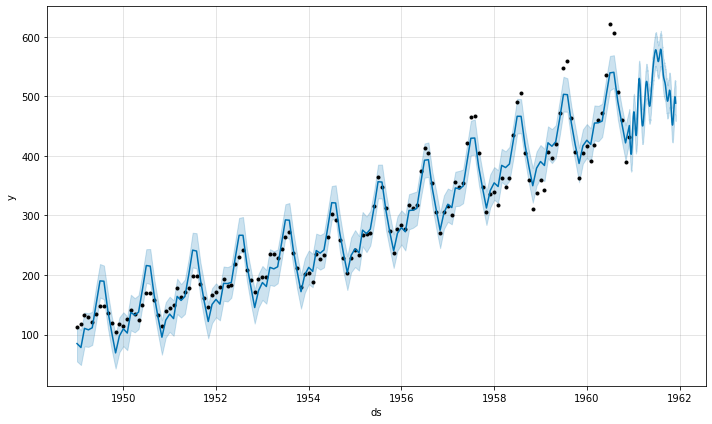

In [54]:
model.plot(prediction)

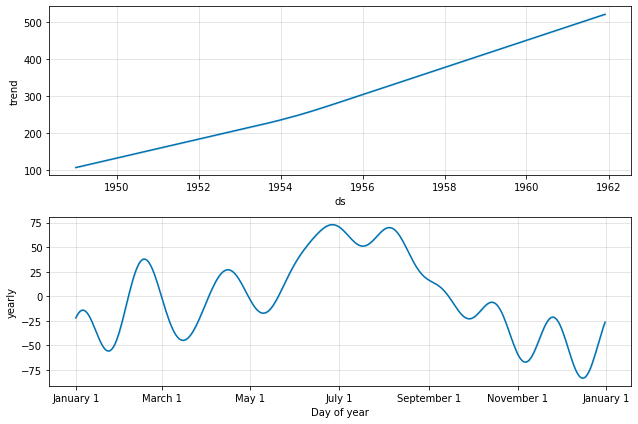

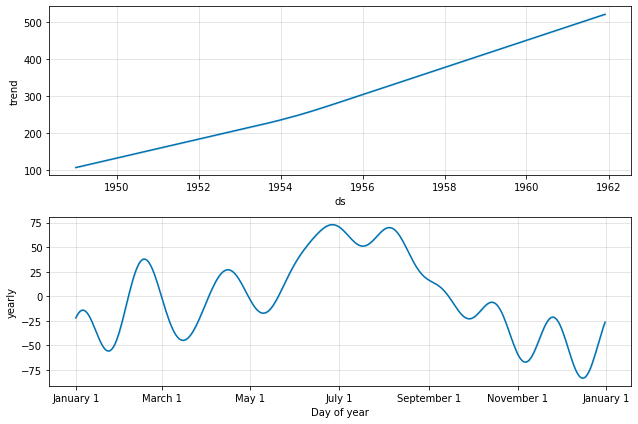

In [55]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

# Predictions Based on lesser data

In [60]:
# Creating a smaller dataset
ds2 = ds.tail(12)
ds2.head()

,ds,y
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472


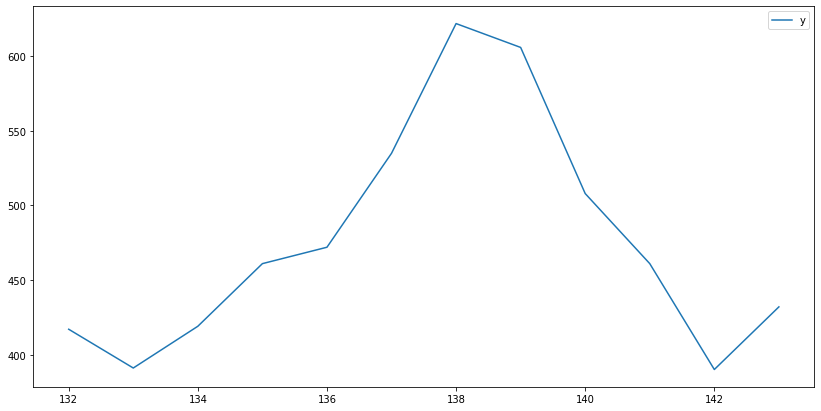

In [62]:
ds2.plot()

In [63]:
model2 = Prophet()
model2.fit(ds2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [67]:
model2.seasonalities

OrderedDict()

In [66]:
model2.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive', 'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [68]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [69]:
future_dates.head()

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01


In [70]:
# Predictions
prediction2 = model.predict(future_dates)

In [74]:
prediction2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,453.650127,365.615134,543.606637,453.650127,453.650127,0.0,0.0,0.0,0.0,0.0,0.0,453.650127
1,1960-02-01,457.858854,365.083782,546.538524,457.858854,457.858854,0.0,0.0,0.0,0.0,0.0,0.0,457.858854
2,1960-03-01,461.796051,356.587840,557.219408,461.796051,461.796051,0.0,0.0,0.0,0.0,0.0,0.0,461.796051
3,1960-04-01,466.004778,370.216706,558.667378,466.004778,466.004778,0.0,0.0,0.0,0.0,0.0,0.0,466.004778
4,1960-05-01,470.077740,385.277641,565.586654,470.077740,470.077740,0.0,0.0,0.0,0.0,0.0,0.0,470.077740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,1961-11-27,548.134405,460.135319,645.681211,548.132360,548.136612,0.0,0.0,0.0,0.0,0.0,0.0,548.134405
373,1961-11-28,548.270154,453.670490,643.805880,548.268096,548.272374,0.0,0.0,0.0,0.0,0.0,0.0,548.270154
374,1961-11-29,548.405903,459.253444,637.589760,548.403832,548.408136,0.0,0.0,0.0,0.0,0.0,0.0,548.405903
375,1961-11-30,548.541652,451.644246,643.290092,548.539567,548.543897,0.0,0.0,0.0,0.0,0.0,0.0,548.541652


In [72]:
prediction2[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1960-01-01,453.650127,365.615134,543.606637
1,1960-02-01,457.858854,365.083782,546.538524
2,1960-03-01,461.796051,356.587840,557.219408
3,1960-04-01,466.004778,370.216706,558.667378
4,1960-05-01,470.077740,385.277641,565.586654


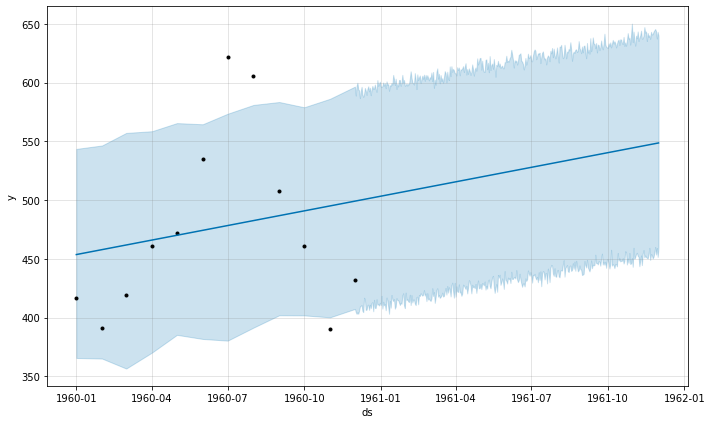

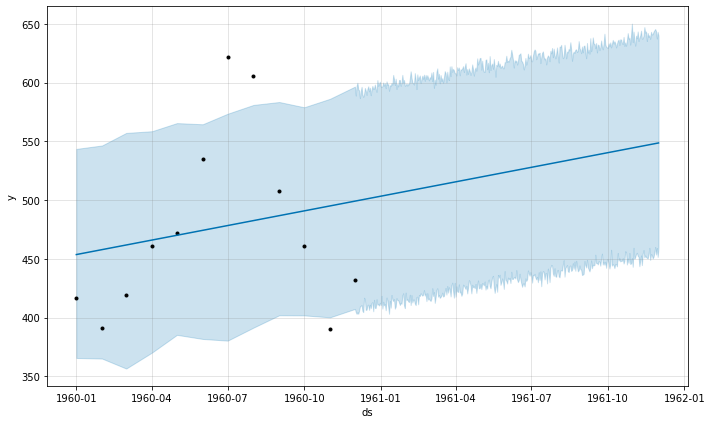

In [76]:
# plotting the predictions
model.plot(prediction2)